In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [9]:
with sqlite3.connect('/Users/Marcy_Student/Desktop/Projects /Project-Theme-Park-Analytics-/Data/themepark.db') as conn:
    cursor = conn.cursor()
    cursor.execute

In [10]:
df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
df.head()

,name
0,dim_guest
1,dim_ticket
2,dim_attraction
3,fact_visits
4,fact_ride_events


In [11]:
columns = pd.read_sql_query("PRAGMA table_info(dim_ticket);", conn)
print(columns)

   cid              name     type  notnull dflt_value  pk
0    0    ticket_type_id  INTEGER        0       None   1
1    1  ticket_type_name     TEXT        1       None   0
2    2  base_price_cents  INTEGER        0       None   0
3    3      restrictions     TEXT        0       None   0


In [12]:
columns = pd.read_sql("PRAGMA table_info(fact_visits);", conn)
print(columns)

    cid               name     type  notnull dflt_value  pk
0     0           visit_id  INTEGER        0       None   1
1     1           guest_id  INTEGER        1       None   0
2     2     ticket_type_id  INTEGER        1       None   0
3     3         visit_date     TEXT        1       None   0
4     4            date_id  INTEGER        0       None   0
5     5         party_size  INTEGER        0       None   0
6     6         entry_time     TEXT        0       None   0
7     7          exit_time     TEXT        0       None   0
8     8  total_spend_cents     TEXT        0       None   0
9     9     promotion_code     TEXT        0       None   0
10   10  spend_cents_clean  INTEGER        0       None   0


In [13]:
query = """
SELECT 
    dt.ticket_type_name AS ticket_type_name,
    COUNT(fv.visit_id) AS total_visits
FROM fact_visits fv
JOIN dim_ticket dt 
    ON fv.ticket_type_id = dt.ticket_type_id
GROUP BY dt.ticket_type_name
ORDER BY total_visits DESC;
"""

df = pd.read_sql(query, conn)
print(df.head())

  ticket_type_name  total_visits
0         Day Pass            22
1              VIP            18
2      Family Pack             7


/var/folders/lv/2nxyfpy14xv39gqw4vptbxlm0000gp/T/ipykernel_75373/3473468380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ticket_type_name", y="total_visits", palette="viridis")


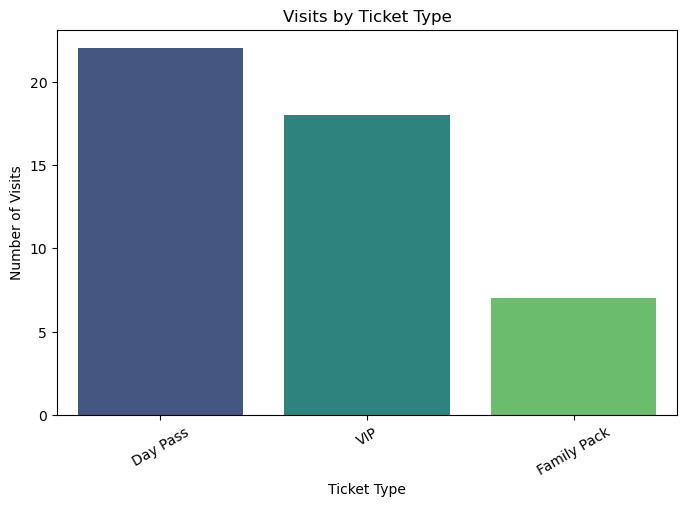

In [14]:

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="ticket_type_name", y="total_visits", palette="viridis")

plt.title("Visits by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Visits")
plt.xticks(rotation=30)
plt.show()